# Compare years metrics: 2019 vs 2020

In [1]:
%config IPCompleter.greedy=True # jupyter autocomplete
%config InlineBackend.figure_format = 'retina'

from datetime import datetime, timedelta
import pathlib

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

import numpy as np
import pandas as pd


DATE = 'date'
date_fmt = '%Y-%m-%d'
plot_date_formatter = mdates.DateFormatter('%b %d')

metrics_filepath = '../outputs/metrics'
outputs_figures_filepath = '../outputs/figures/'

In [2]:
# for comparing years. Note only have 2019 data through June
data_dates = ('03-07','05-31') # mm-dd

def get_data_dates_idx(year, data_dates=data_dates):
    """
    Returns (start, end), idx
    where start, end are in yyyy-mm-dd format and idx is a DatetimeIndex
    """
    dates = ('%s-%s'%(year, data_dates[0]), '%s-%s'%(year, data_dates[1]))
    idx = pd.Index(
        pd.date_range(pd.to_datetime(dates[0], format=date_fmt), dates[1])
    ).set_names(DATE)
    return dates, idx

data_dates_2019, data_dates_2019_idx = get_data_dates_idx(2019)
data_dates_2020, data_dates_2020_idx = get_data_dates_idx(2020)

There are missing data due to missed data reported by the telecom. 

###### Missing data dates

2019:
1. 2019-03-01
2. 2019-06-07 - 2019-06-11

2020:
1. 2020-02-14 - 2020-03-01
2. 2020-06-28 - 2020-06-29
3. 2020-07-21 - 2020-07-27

But none of the above dates are in the data dates range to compare...

So we will not worry.

In [3]:
# For plotting, use a consistent size
figsize=(10,4)

In [4]:
c_2019 = 'green'
c_2020 = 'purple'

def plot_2019_v_2020(data_2019, data_2020, ax=None, dpi=100, 
                     label=''):
    if ax is None:
        fig, ax = plt.subplots(1, figsize=figsize, dpi=dpi)
        plt.ticklabel_format(style='plain') # to prevent scientific notation.
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
    plot_idx = data_2020.index
    ax.plot(plot_idx,
            data_2019, 
            '. ', c=c_2019, label='%s %s '%(2019, label))
    ax.plot(plot_idx, 
            data_2019.rolling(window=7, center=True, min_periods=1).mean(),
            '-', c=c_2019)
    ax.plot(plot_idx,
            data_2020, 
            '. ', c=c_2020, label='%s %s '%(2020, label))
    ax.plot(plot_idx, 
            data_2020.rolling(window=7, center=True, min_periods=1).mean(),
            '-', c=c_2020)
    ax.set_xlim(plot_idx.min(), plot_idx.max())
    ax.set_ylim(0, data_2019.max()*1.2)
    ax.xaxis.set_major_formatter(plot_date_formatter)
    ax.legend()
    return ax


## Trips data

In [5]:
def read_trips_df(year):
    fpath = ('%s/%s/trips.csv' % (metrics_filepath,year))
    df = pd.read_csv(fpath).set_index(DATE)
    df.index = pd.to_datetime(df.index)
    return df

In [6]:
trips_2019_df = read_trips_df(2019).reindex(data_dates_2019_idx)
trips_2019_df.head()

,users making trips,total trips,mean trips,median trips
date,,,,
2019-03-07,87167,1048168,11.054526,10.0
2019-03-08,93188,1046507,10.168456,9.0
2019-03-09,95534,945393,8.708323,7.0
2019-03-10,88150,802096,7.875268,6.0
2019-03-11,78744,896996,10.445490,9.0


In [7]:
trips_2020_df = read_trips_df(2020).reindex(data_dates_2020_idx)
trips_2020_df.head()

,users making trips,total trips,mean trips,median trips
date,,,,
2020-03-07,70909,551307,6.232768,3.0
2020-03-08,65394,453150,5.302853,3.0
2020-03-09,65638,531454,6.796435,4.0
2020-03-10,63290,520117,6.868861,4.0
2020-03-11,67395,552604,6.944093,4.0


In [8]:
trips_2019 = trips_2019_df['total trips']
trips_2020 = trips_2020_df['total trips']
trips_2020.head()

date
2020-03-07    551307
2020-03-08    453150
2020-03-09    531454
2020-03-10    520117
2020-03-11    552604
Freq: D, Name: total trips, dtype: int64

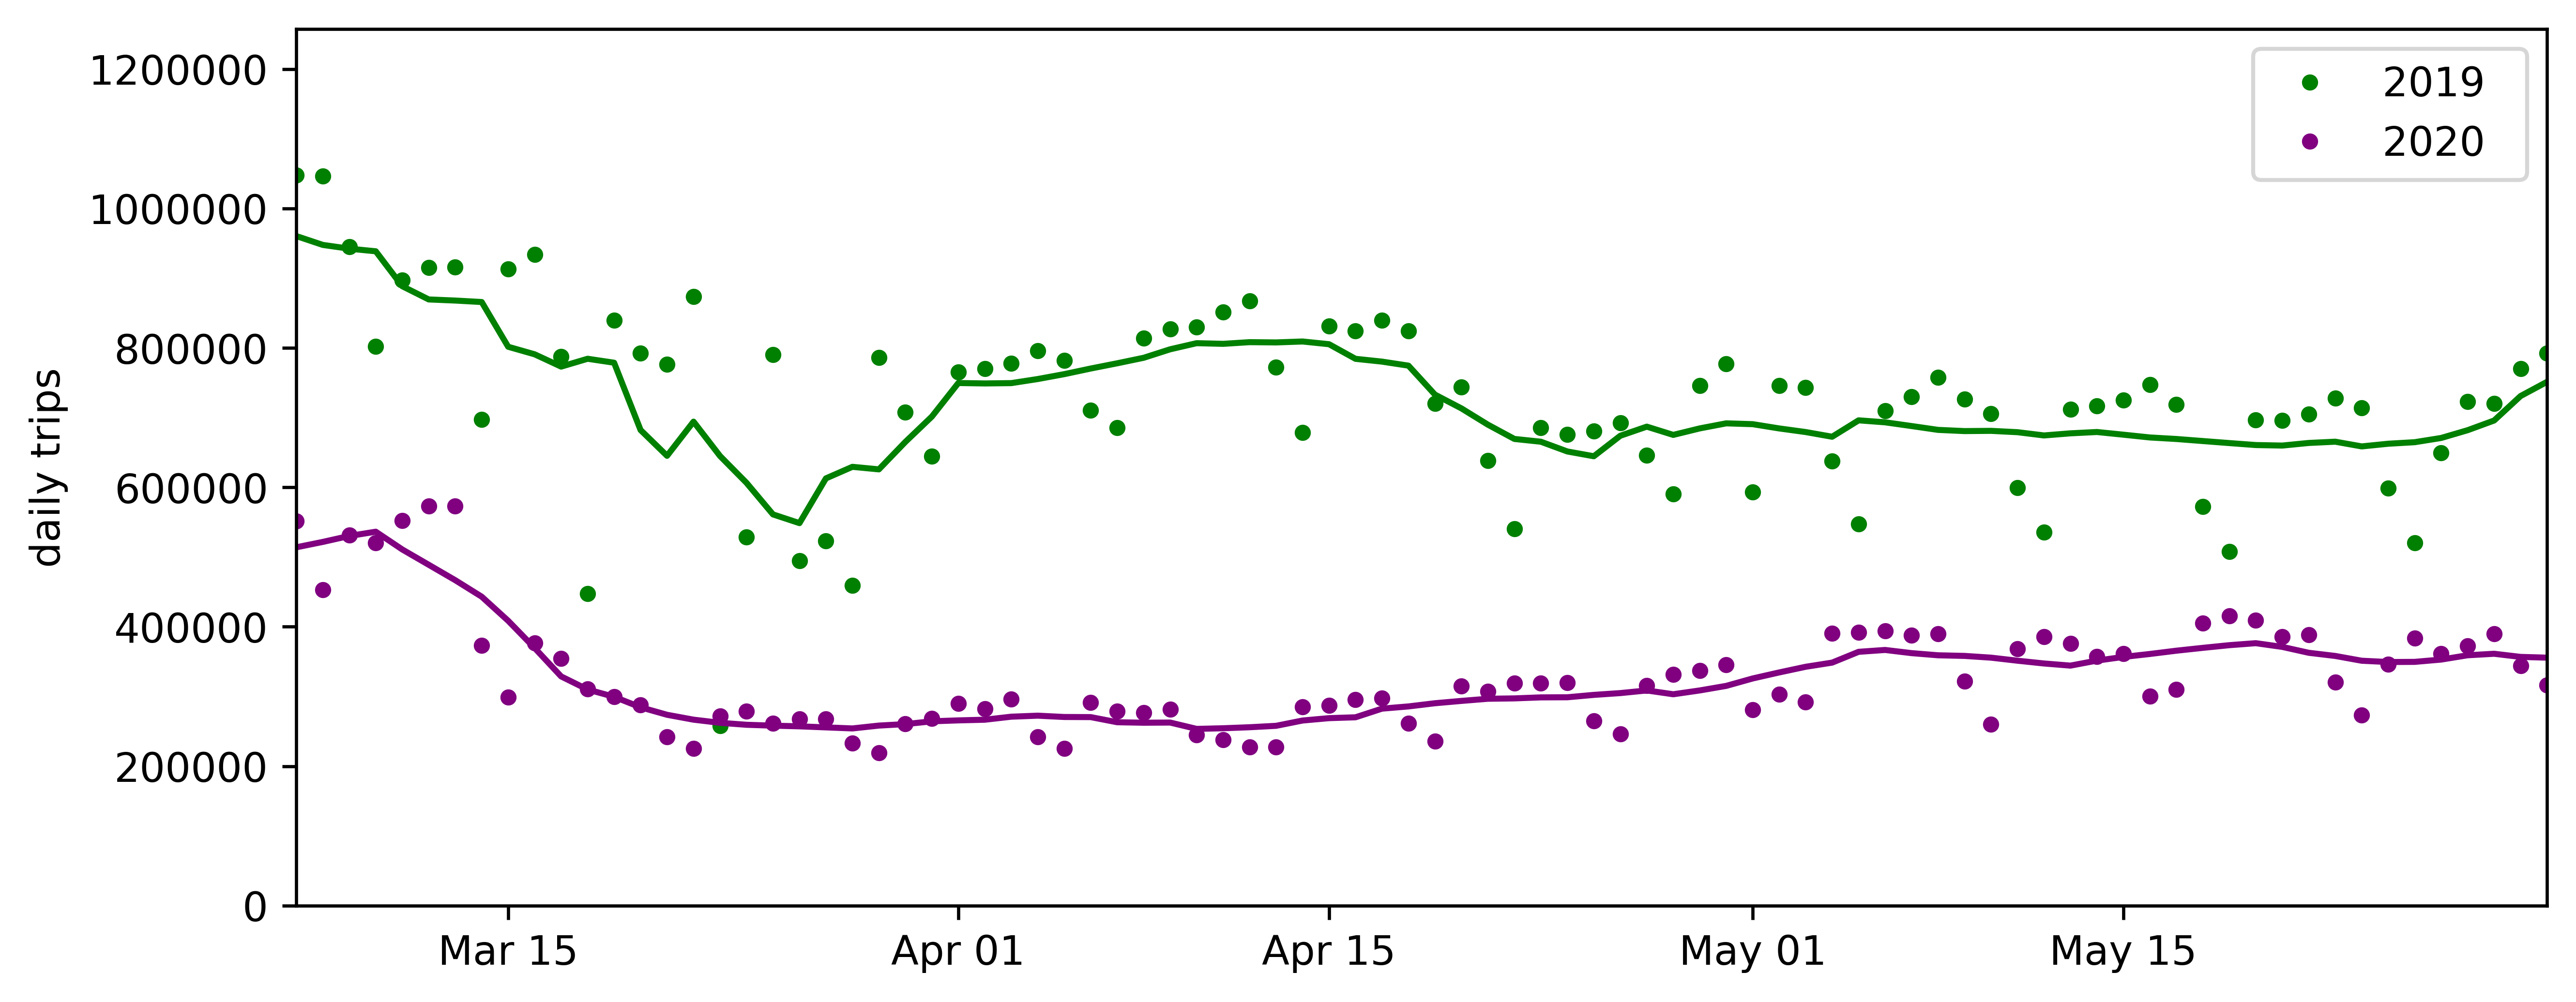

In [9]:
ax = plot_2019_v_2020(trips_2019, trips_2020, dpi=300)
ax.xaxis.set_major_formatter(plot_date_formatter)
_ = ax.set_ylabel('daily trips', labelpad=5)

## Population present

In [10]:
DEFAULT_WINDOW = 13
def read_presence_df(year, window=13):
    fpath = ('%s/%s/presence%s.csv' % (
        metrics_filepath, year,
        ('_%s_day_window'%window if window!=DEFAULT_WINDOW else '')
    ))
    df = pd.read_csv(fpath).set_index(DATE)
    df.index = pd.to_datetime(df.index)
    return df

Using 6-day window

In [11]:
presence_2019_w6_df = read_presence_df(2019, window=6)
presence_2020_w6_df = read_presence_df(2020, window=6)

First just plot the 2020 data to view it makes sense.

Note there is missing data for mid Feb - March 1, and in July

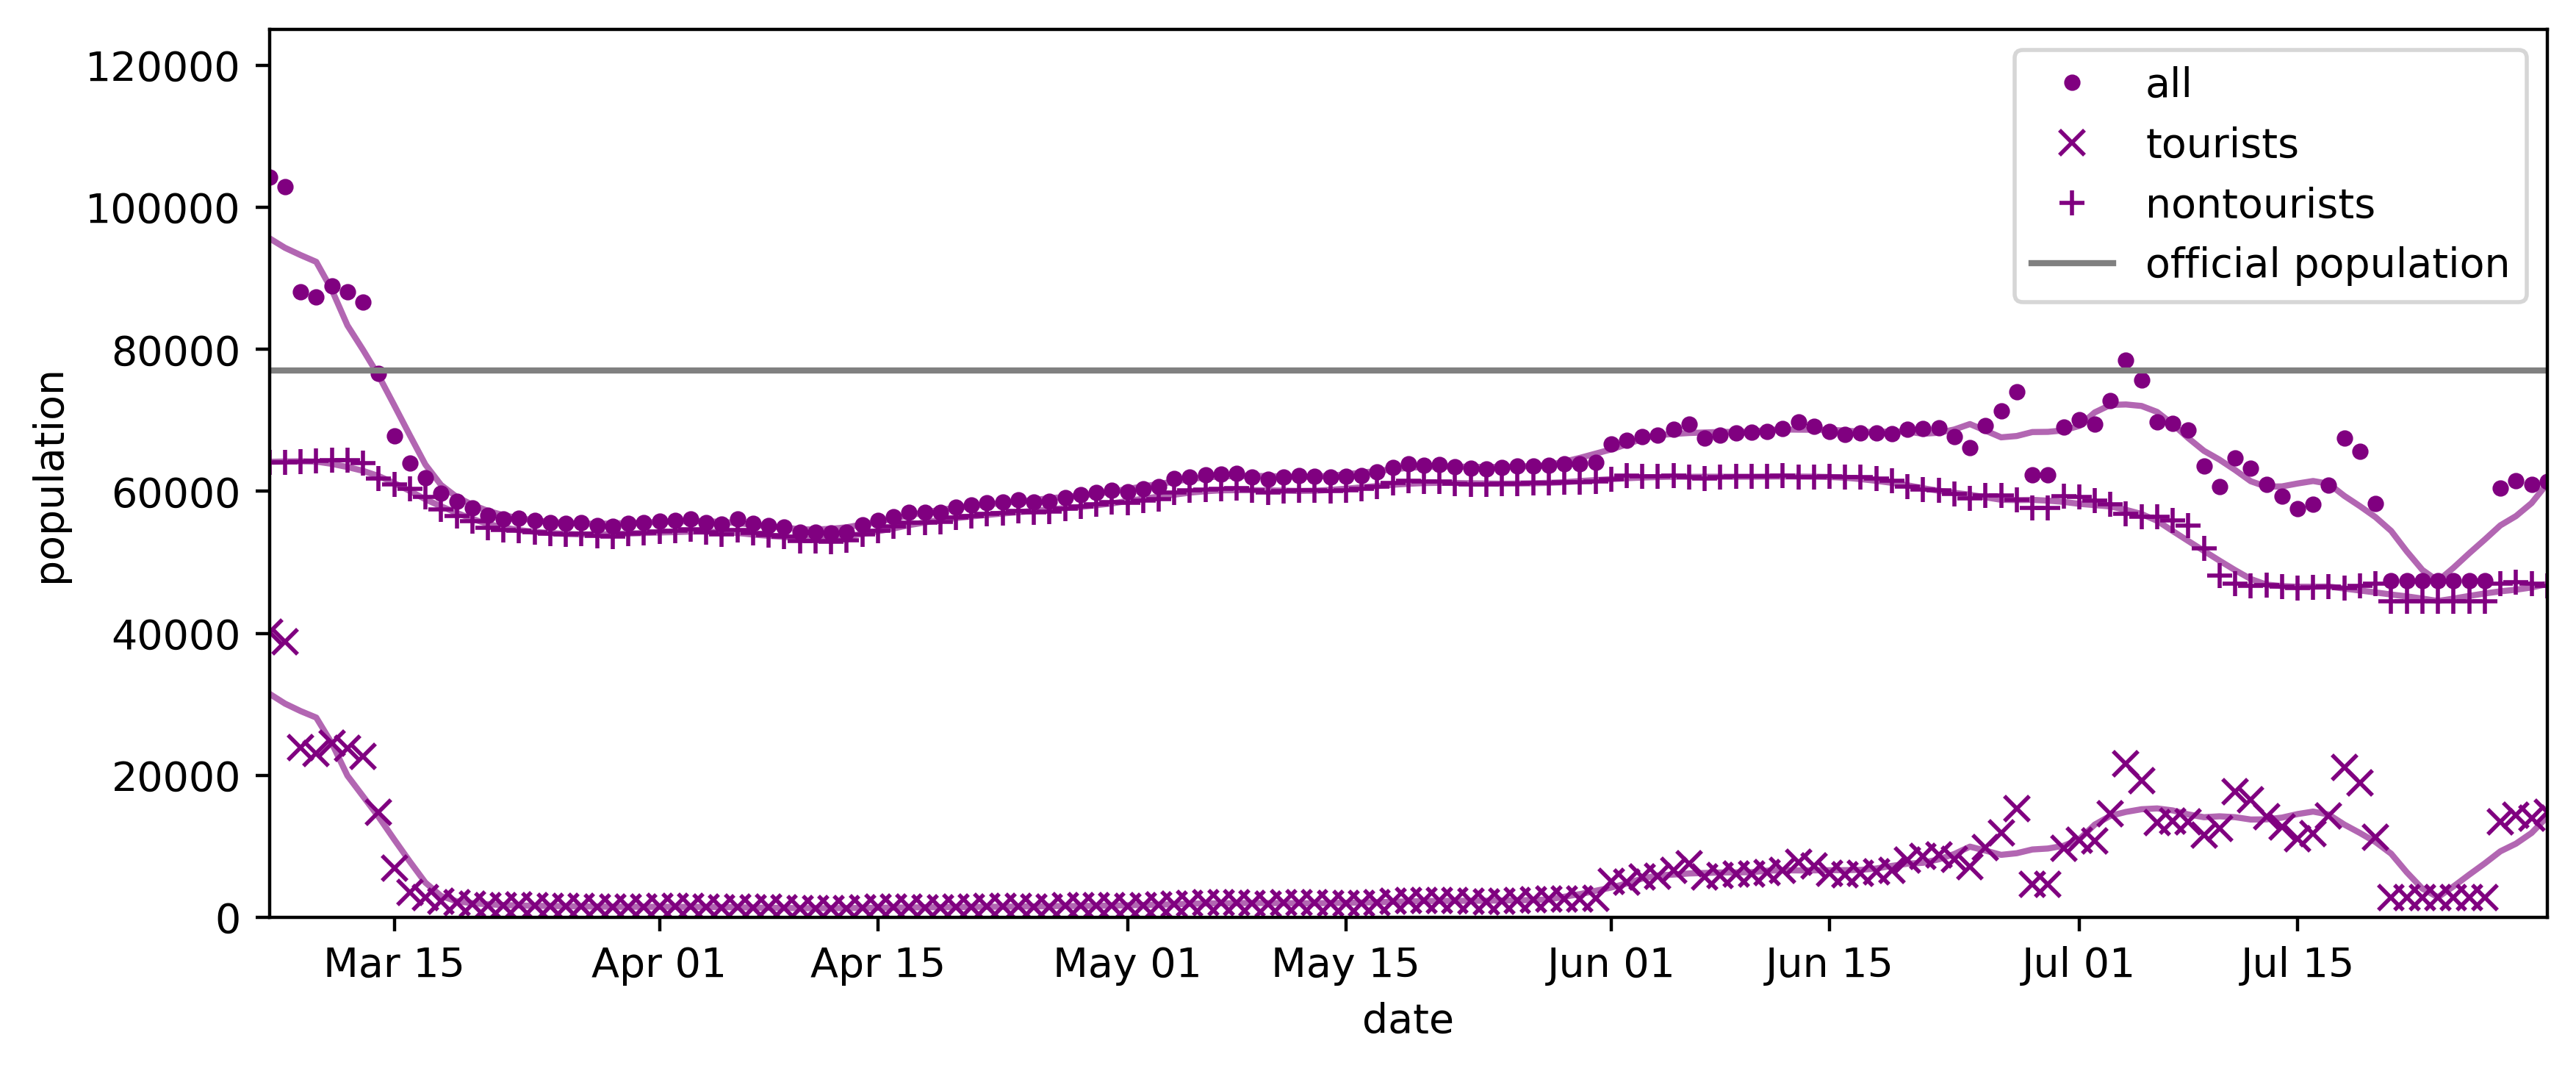

,all,tourists,non-tourists
date,,,
2020-03-07,104229,40143,64086
2020-03-08,102917,38846,64071
2020-03-09,88055,23865,64190
2020-03-10,87360,23079,64281
2020-03-11,88913,24537,64376


In [12]:
dpi=200
fig, ax = plt.subplots(1, figsize=figsize, dpi=dpi)
plot_idx = presence_2020_w6_df['2020-03-07':'2020-07-31'].index
ax.plot(plot_idx,
        presence_2020_w6_df.loc[plot_idx]['all'], 
        '. ', c=c_2020, label='all')
ax.plot(plot_idx, 
        presence_2020_w6_df.loc[plot_idx]['all'].rolling(window=7, center=True, min_periods=1).mean(),
        '-', c=c_2020, alpha=0.6)
ax.plot(plot_idx,
        presence_2020_w6_df.loc[plot_idx]['tourists'], 
        'x', c=c_2020, label='tourists')
ax.plot(plot_idx, 
        presence_2020_w6_df.loc[plot_idx]['tourists'].rolling(window=7, center=True, min_periods=1).mean(),
        '-', c=c_2020, alpha=0.6)
ax.plot(plot_idx,
        presence_2020_w6_df.loc[plot_idx]['non-tourists'], 
        '+', c=c_2020, label='nontourists')
ax.plot(plot_idx, 
        presence_2020_w6_df.loc[plot_idx]['non-tourists'].rolling(window=7, center=True, min_periods=1).mean(),
        '-', c=c_2020, alpha=0.6)
ax.axhline(y=77000, color='gray', linestyle='-', label='official population')
ax.legend()
ax.set_xlim(plot_idx.min(), plot_idx.max())
ax.set_ylim(0, presence_2020_w6_df.loc[plot_idx]['all'].max()*1.2)
ax.set_ylabel('population')
ax.set_xlabel('date')
ax.xaxis.set_major_formatter(plot_date_formatter)
plt.show()
presence_2020_w6_df.loc[plot_idx].head()

Compare 2019 vs 2020

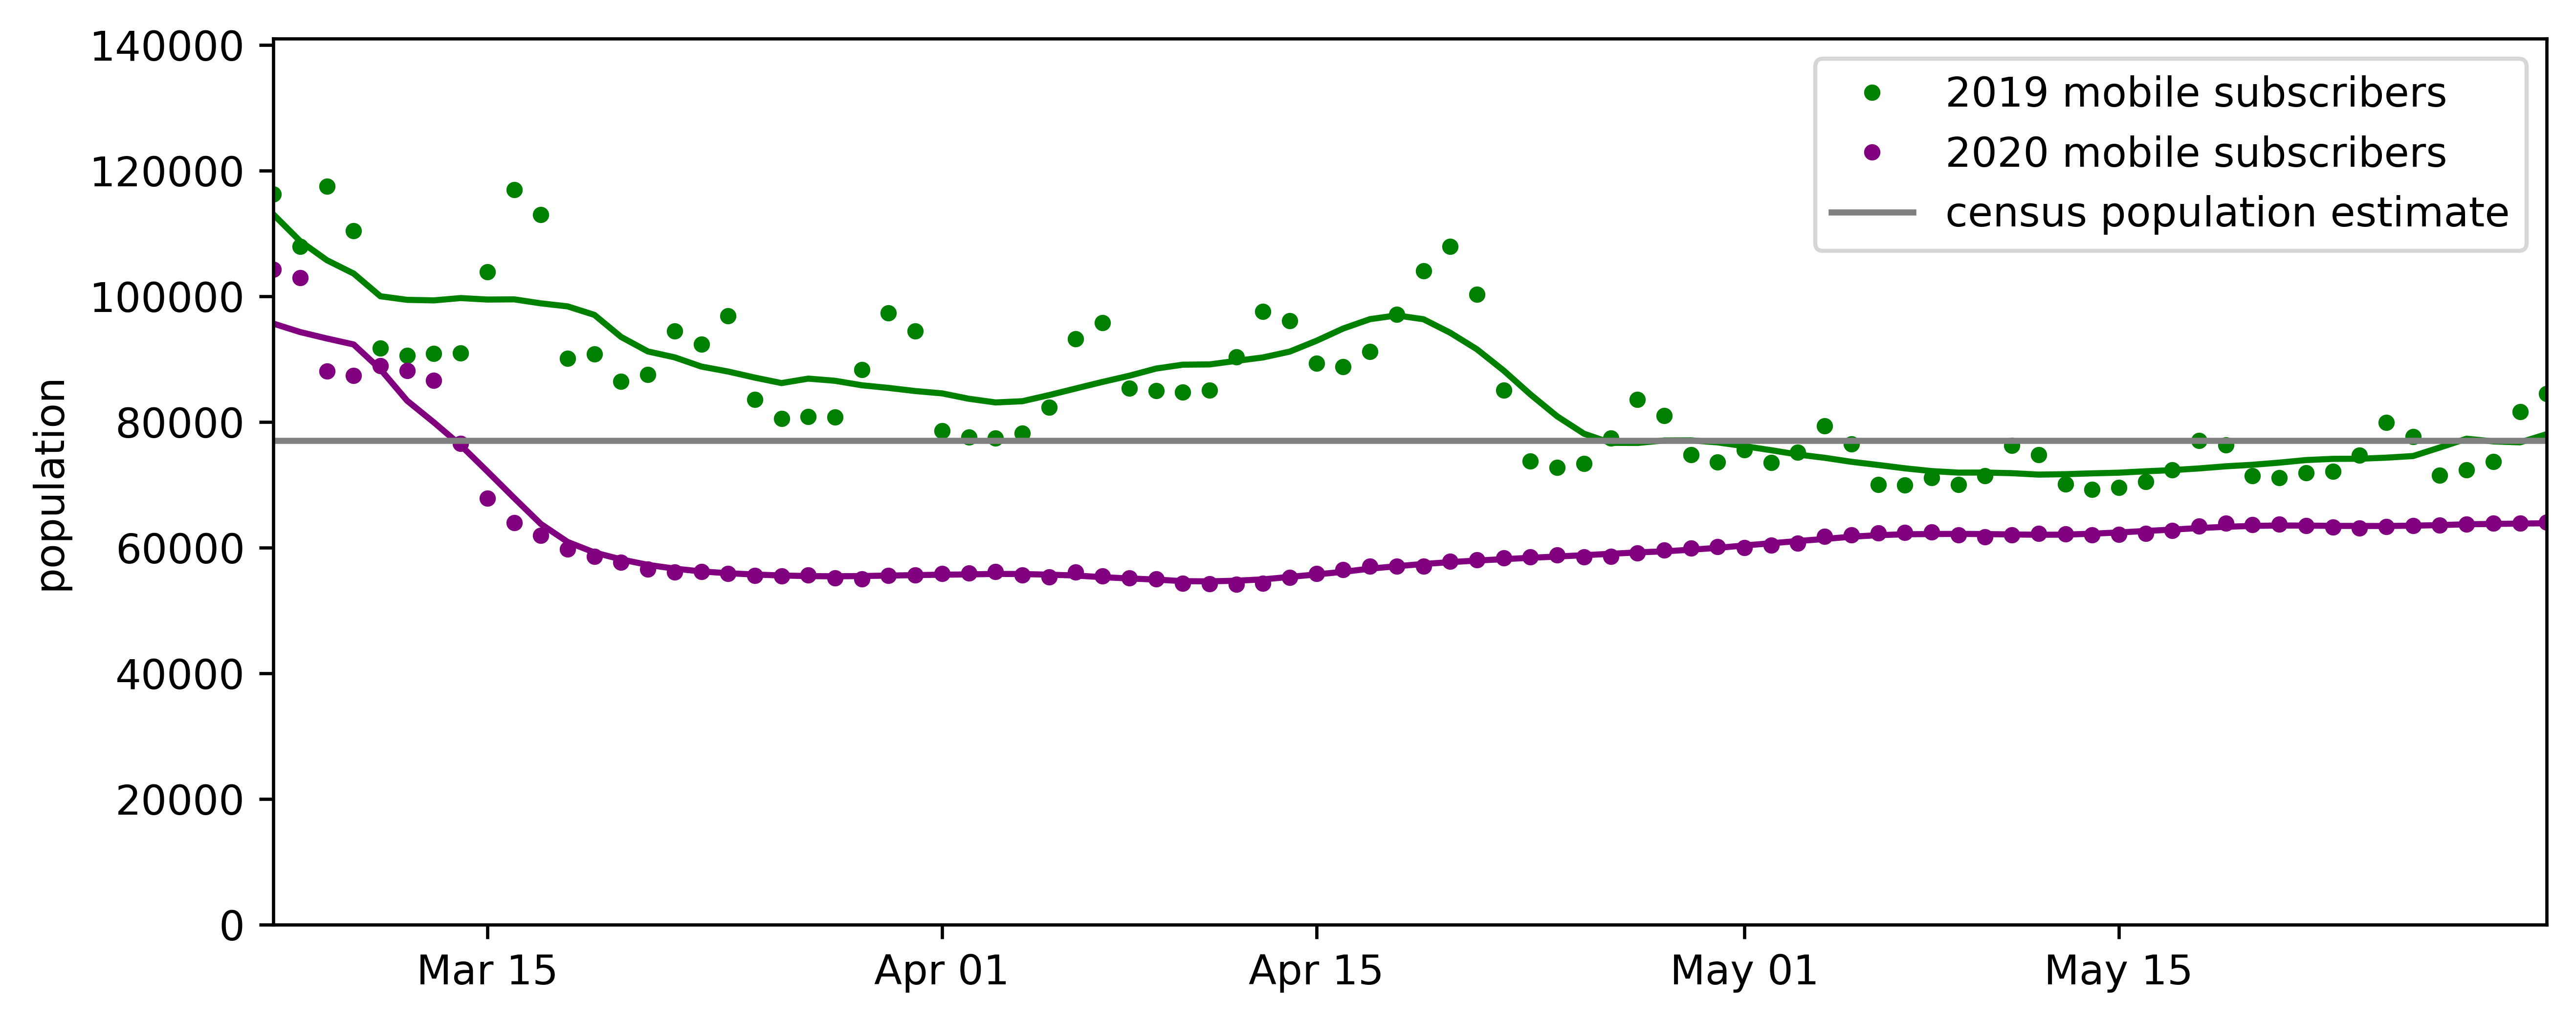

date
2019-03-07    116213
2019-03-08    107900
2019-03-09    117517
2019-03-10    110429
2019-03-11     91759
Freq: D, Name: all, dtype: int64

In [13]:
presence_2019_w6 = presence_2019_w6_df.reindex(data_dates_2019_idx)['all']
presence_2020_w6 = presence_2020_w6_df.reindex(data_dates_2020_idx)['all']
ax = plot_2019_v_2020(presence_2019_w6, presence_2020_w6, dpi=300, label='mobile subscribers')
ax.axhline(y=77000, color='gray', linestyle='-', label='census population estimate')
_ = ax.set_ylabel('population', labelpad=5)
_ = ax.legend()
plt.show()
presence_2019_w6.head()

## Entrances and departures

In [14]:
ALL = 'All'
OTHER_MCC = 'other'
NON_ANDORRAN = 'Non-Andorran'
ANDORRAN_MCC = '213'

mcc_names_dict = {
    '213':'Andorran',
    '214':'Spanish',
    '208':'French',
    '234':'British',
    # otherwise nationality is 'other'
    OTHER_MCC: 'Other'
}
mcc_names=[mcc_names_dict[code]  for code in mcc_names_dict]

In [15]:
def read_entrance_departure_df(year, window=13):
    fpath = ('%s/%s/entrance_departure%s.csv' % (
        metrics_filepath, year,
        ('_%s_day_window'%window if window!=DEFAULT_WINDOW else '')
    ))
    df = pd.read_csv(fpath).rename(columns={'Unnamed: 0': DATE}).set_index(DATE)
    df.index = pd.to_datetime(df.index)
    return df

In [16]:
entrance_departure_2019_w6_df = read_entrance_departure_df(2019, window=6).reindex(data_dates_2019_idx)
entrance_departure_2020_w6_df = read_entrance_departure_df(2020, window=6).reindex(data_dates_2020_idx)
entrance_departure_2019_w6_df.head()

,entrance_Andorran,entrance_Spanish,entrance_French,entrance_British,entrance_Other,departures_Andorran,departures_Spanish,departures_French,departures_British,departures_Other
date,,,,,,,,,,
2019-03-07,0,0,0,0,0,336,2337,3997,208,1435
2019-03-08,0,0,0,0,0,488,3910,4851,308,2888
2019-03-09,363,10002,8772,435,2490,354,7743,8607,569,5144
2019-03-10,364,4836,6035,1340,2754,558,12818,8104,1630,2652
2019-03-11,465,2684,2535,210,1198,409,2938,2366,295,899


In [17]:
# all entrances and departures
entrance_departure_dfs = [
    entrance_departure_2019_w6_df, entrance_departure_2020_w6_df,
]
for df in entrance_departure_dfs:
    entrance_departure_cols = list(df.columns)
    entrance_cols = [c for c in entrance_departure_cols if c.startswith('entrance_')]
    departure_cols = [c for c in entrance_departure_cols if c.startswith('departures_')]
    assert(len(entrance_cols)+len(departure_cols)==len(df.columns))
    df['entrances'] = df[entrance_cols].sum(axis=1)
    df['departures'] = df[departure_cols].sum(axis=1)

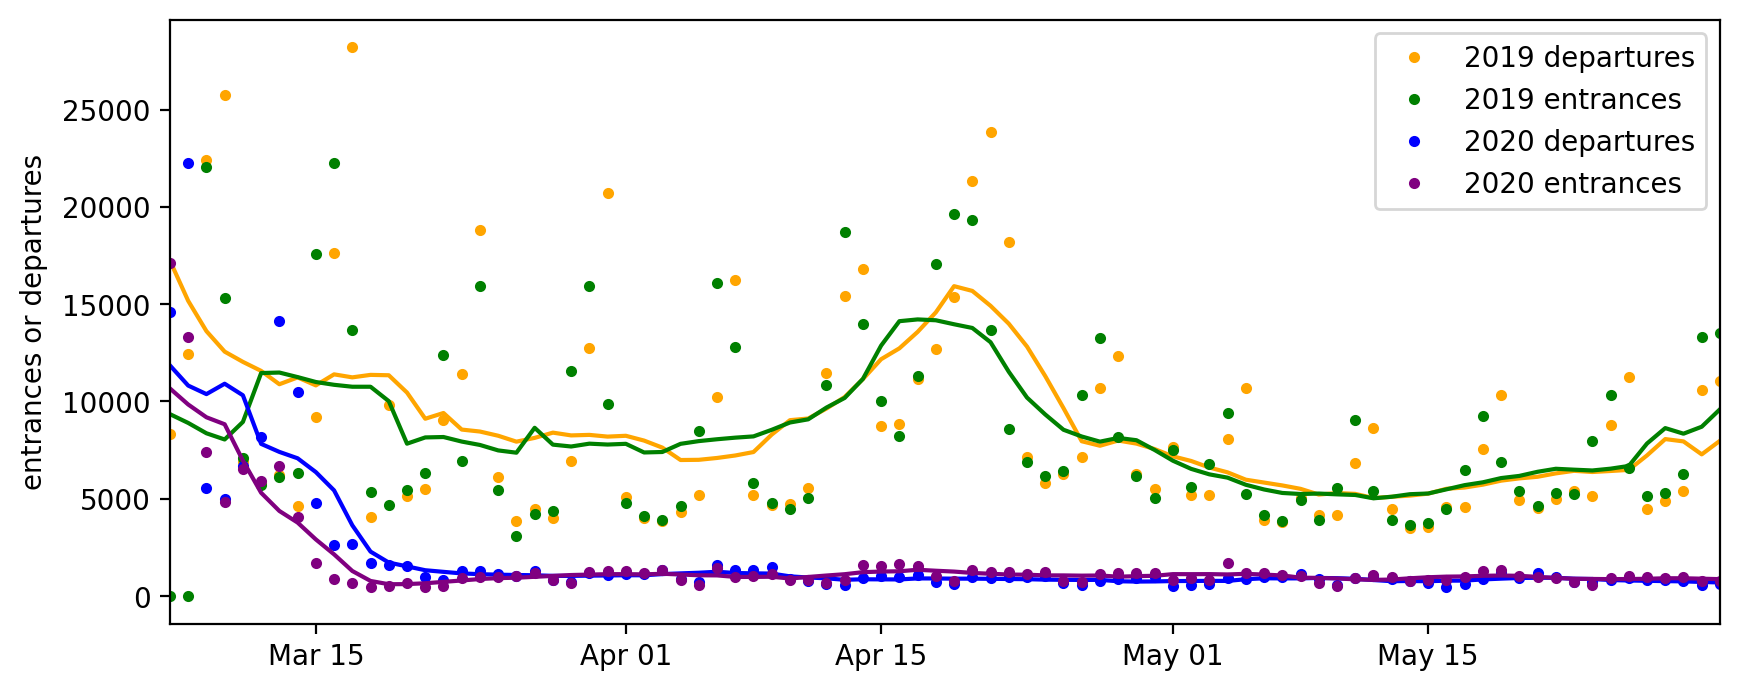

In [20]:
def plot_entrances_departures(ax=None, dpi=100, figsize=figsize):
    if ax is None:
        fig, ax = plt.subplots(1, figsize=figsize, dpi=dpi)

    c_entrances_2020 = c_2020 # purple
    c_departures_2020 = 'blue'
    c_entrances_2019 = c_2019 # green
    c_departures_2019 = 'orange'

    plot_2019_df = entrance_departure_2019_w6_df
    plot_2020_df = entrance_departure_2020_w6_df

    # single plot index for both 2019 and 2020 -- just show m-d
    plot_idx = plot_2020_df.index
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
    # 2019
    ax.plot(plot_idx, plot_2019_df['departures'],
            #'x', 
            '.',
            c=c_departures_2019, label='2019 departures', alpha=1,
           )
    ax.plot(plot_idx, 
            plot_2019_df['departures'].rolling(
                window=7, center=True, min_periods=1
            ).mean(),
            #'--',
            '-', c=c_departures_2019, alpha=1,
           )
    ax.plot(plot_idx, plot_2019_df['entrances'],
            '.', c=c_entrances_2019, label='2019 entrances', alpha=1,
           )
    ax.plot(plot_idx, 
            plot_2019_df['entrances'].rolling(
                window=7, center=True, min_periods=1).mean(),
            '-', c=c_entrances_2019, alpha=1,
           )
    # 2020
    ax.plot(plot_2020_df.index, plot_2020_df['departures'],
            '.',#'x', 
            c=c_departures_2020, label='2020 departures', alpha=1,
           )
    ax.plot(plot_2020_df.index, 
            plot_2020_df['departures'].rolling(
                window=7, center=True, min_periods=1
            ).mean(),
            #'--', 
            '-',
            c=c_departures_2020, alpha=1,
           )
    ax.plot(plot_2020_df.index, plot_2020_df['entrances'],
            '.', c=c_entrances_2020, label='2020 entrances', alpha=1,
           )
    ax.plot(plot_2020_df.index, 
            plot_2020_df['entrances'].rolling(
                window=7, center=True, min_periods=1).mean(),
            '-', c=c_entrances_2020, alpha=1,
           )
    _ = ax.set_ylabel('entrances or departures', labelpad=5)
    ax.set_xlim(plot_idx.min(), plot_idx.max())
    ax.xaxis.set_major_formatter(plot_date_formatter)
    ax.legend()
    return ax
    
_ = plot_entrances_departures()

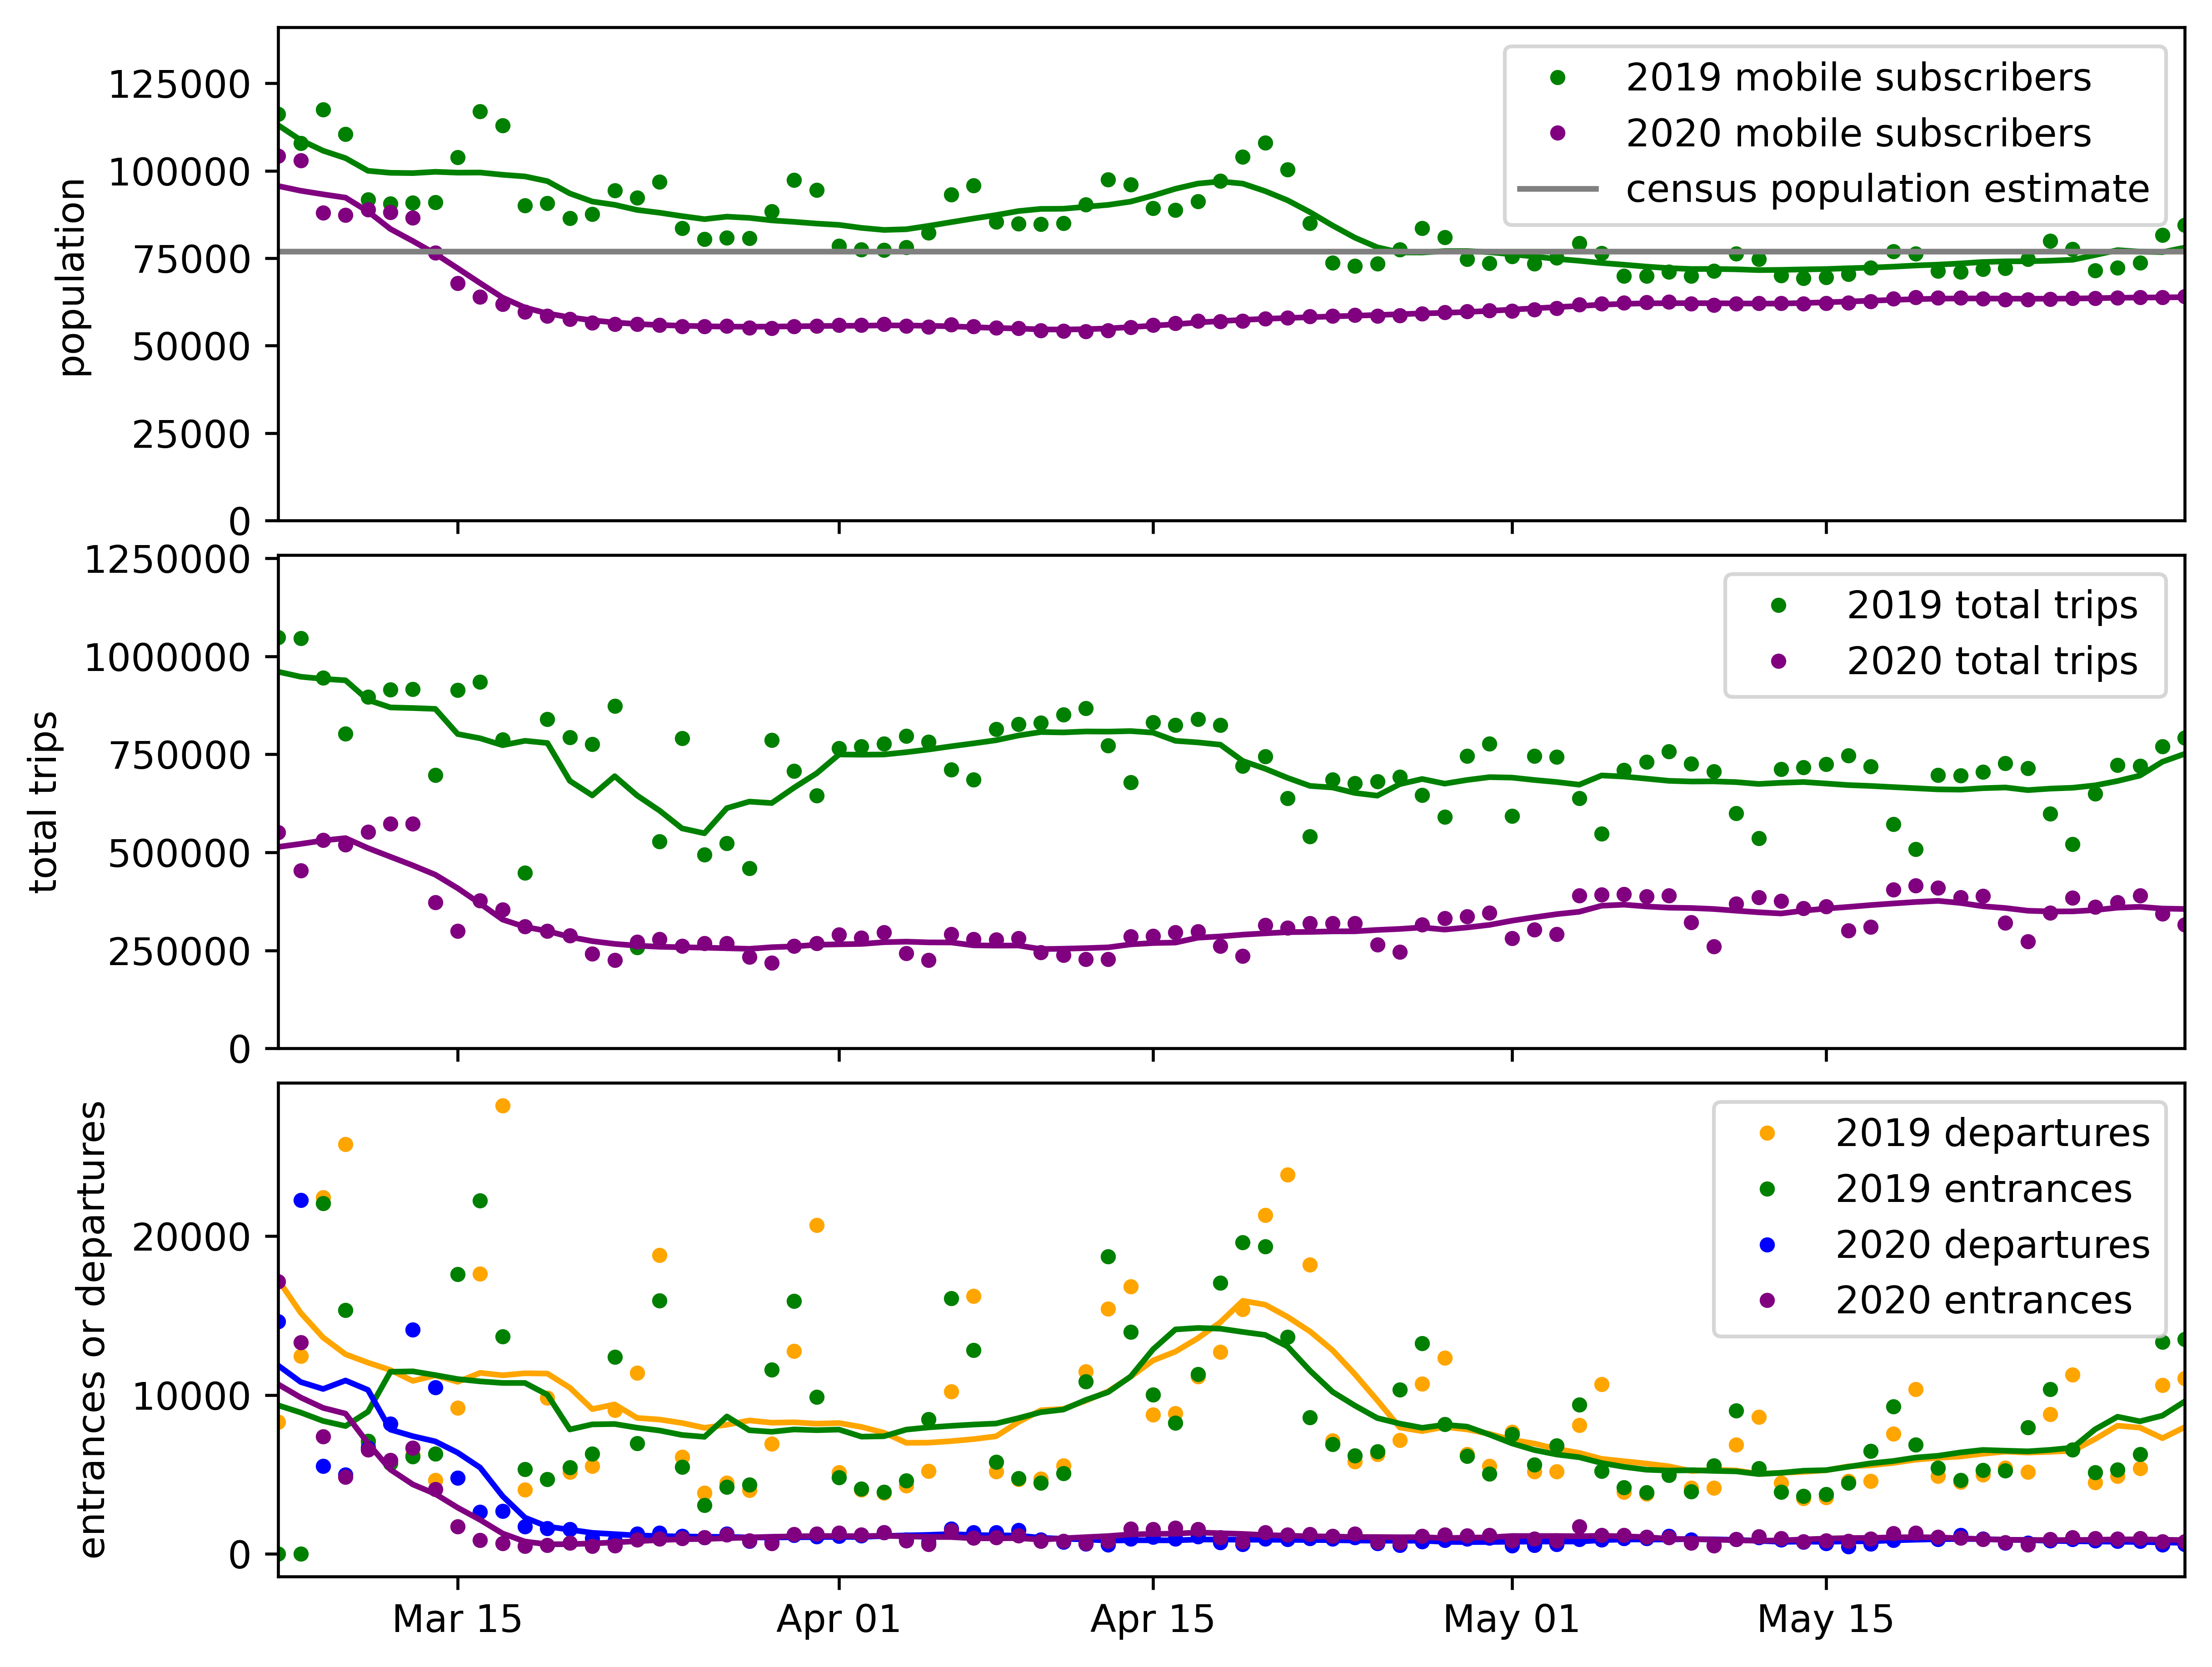

In [21]:
# plot them all together for paper:
dpi=300
fig, axes = plt.subplots(3, sharex=True, figsize=(8,6), dpi=dpi)
for ax in axes:
    ax.ticklabel_format(useOffset=False, style='plain')
_ = plot_2019_v_2020(presence_2019_w6, presence_2020_w6, label='mobile subscribers', ax=axes[0])
axes[0].axhline(y=77000, color='gray', linestyle='-', label='census population estimate')
_ = axes[0].set_ylabel('population', labelpad=5)
_ = axes[0].legend()
_ = plot_2019_v_2020(trips_2019, trips_2020, ax=axes[1], label='total trips')
_ = axes[1].set_ylabel('total trips', labelpad=5)

plot_entrances_departures(ax=axes[2])
fig.tight_layout(pad=0.3)
plt.show()

In [22]:
# save figure for the paper
fig.savefig(outputs_figures_filepath + 'Fig3.tif')
fig.savefig(outputs_figures_filepath + 'Fig3.png')